In [46]:
from collections import defaultdict
import numpy as np

corpus = ['આકાશ', 'પાણી', 'ખેત', 'સુરજ', 'ચાંદ', 'પુસ્તક', 'પરીક્ષા', 'વિજ્ઞાન']

word_index = defaultdict(lambda: len(word_index))
sequences = [[word_index[word] for word in sentence.split()] for sentence in corpus]

embedding_dim = 2
word_embeddings = np.random.randn(len(word_index), embedding_dim)

for word, idx in word_index.items():
    print(f'{word}: {word_embeddings[idx]}')


આકાશ: [ 0.23666378 -0.14773269]
પાણી: [-0.79877246  0.40164146]
ખેત: [ 0.36828548 -0.45821984]
સુરજ: [ 0.75433829 -0.90230139]
ચાંદ: [-0.56339504 -0.6421693 ]
પુસ્તક: [ 0.43372126 -0.81318839]
પરીક્ષા: [-0.26392213  0.42155161]
વિજ્ઞાન: [ 0.67283907 -0.35878316]


Glove

In [40]:
#importing libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

x = {'processing', 'the', 'world', 'prime',
	'natural', 'language'}

# create the dictionary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

#this will print the dictionary of the words mapped with their indexes
print("Dictionary is = ", tokenizer.word_index)

def embedding_vocab(filepath, word_index,embedding_dim):
	vocab_size = len(word_index) + 1


	embedding_matrix_vocab = np.zeros((vocab_size,
									embedding_dim))

	with open(filepath, encoding="utf8") as f:
		for line in f:
			word, *vector = line.split()
			if word in word_index:
				idx = word_index[word]
				embedding_matrix_vocab[idx] = np.array(
					vector, dtype=np.float32)[:embedding_dim]
	return embedding_matrix_vocab
#matrix
embedding_dim = 50
embedding_matrix_vocab = embedding_vocab(
	'/content/glove.6B.50d.txt', tokenizer.word_index,
embedding_dim)

print("embedding for first word is => ",embedding_matrix_vocab[1])



Dictionary is =  {'prime': 1, 'the': 2, 'language': 3, 'world': 4, 'natural': 5, 'processing': 6}
embedding for first word is =>  [ 0.50795001  0.69881999  0.41468     0.49972999  0.82731003  0.58882999
 -0.43408     0.21703    -1.81809998 -0.74273998 -0.17991     0.28492999
 -0.16937     0.87449002  0.55294001  0.91030997  0.21957    -0.4851
  0.75489002  0.52341998  0.5438      0.10108    -0.07919    -0.11478
  0.29473999 -1.60039997  0.52854002  0.04084    -0.7198      1.93540001
  2.81900001  0.60715997 -1.12080002  0.057194    0.14309999  0.47372001
  0.59581     0.11381    -0.79955    -0.28086999 -0.32896999  1.32560003
 -1.18040001 -1.38600004  0.20202     0.51486999 -1.90680003  0.65419
  1.72459996 -0.6013    ]


**word** **embeddings** **from** **scratch**




load_data

In [ ]:
file = open('/content/text_data.txt', 'r')
text = file.readlines()
print(text)
file.close()

['Machine learning is the study of computer algorithms that \n', 'improve automatically through experience. It is seen as a \n', 'subset of artificial intelligence. Machine learning algorithms \n', 'build a mathematical model based on sample data, known as \n', 'training data, in order to make predictions or decisions without \n', 'being explicitly programmed to do so. Machine learning algorithms \n', 'are used in a wide variety of applications, such as email filtering \n', 'and computer vision, where it is difficult or infeasible to develop \n', 'conventional algorithms to perform the needed tasks.\n']


remove \n

In [ ]:
for i in range(len(text)):
    text[i] = text[i].lower().replace('\n', '')

print(text)

['machine learning is the study of computer algorithms that ', 'improve automatically through experience. it is seen as a ', 'subset of artificial intelligence. machine learning algorithms ', 'build a mathematical model based on sample data, known as ', 'training data, in order to make predictions or decisions without ', 'being explicitly programmed to do so. machine learning algorithms ', 'are used in a wide variety of applications, such as email filtering ', 'and computer vision, where it is difficult or infeasible to develop ', 'conventional algorithms to perform the needed tasks.']


stopwords fillter

In [ ]:
stopwords = ['the', 'are', 'as', 'do' , 'in', 'of','on','or', 'so', 'that', 'to', 'is', 'will', 'be', 'a', 'only', 'can', 'their', 'now', 'and', 'at', 'it']

filtered_data = []
for sent in text:
    temp = []
    for word in sent.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)

print(filtered_data)

[['machine', 'learning', 'study', 'computer', 'algorithms'], ['improve', 'automatically', 'through', 'experience.', 'seen'], ['subset', 'artificial', 'intelligence.', 'machine', 'learning', 'algorithms'], ['build', 'mathematical', 'model', 'based', 'sample', 'data,', 'known'], ['training', 'data,', 'order', 'make', 'predictions', 'decisions', 'without'], ['being', 'explicitly', 'programmed', 'so.', 'machine', 'learning', 'algorithms'], ['used', 'wide', 'variety', 'applications,', 'such', 'email', 'filtering'], ['computer', 'vision,', 'where', 'difficult', 'infeasible', 'develop'], ['conventional', 'algorithms', 'perform', 'needed', 'tasks.']]


bigrams

In [ ]:
bigrams = []
for words_list in filtered_data:
    for i in range(len(words_list) - 1):
        for j in range(i+1, len(words_list)):
            bigrams.append([words_list[i], words_list[j]])
            bigrams.append([words_list[j], words_list[i]])


print(bigrams)

[['machine', 'learning'], ['learning', 'machine'], ['machine', 'study'], ['study', 'machine'], ['machine', 'computer'], ['computer', 'machine'], ['machine', 'algorithms'], ['algorithms', 'machine'], ['learning', 'study'], ['study', 'learning'], ['learning', 'computer'], ['computer', 'learning'], ['learning', 'algorithms'], ['algorithms', 'learning'], ['study', 'computer'], ['computer', 'study'], ['study', 'algorithms'], ['algorithms', 'study'], ['computer', 'algorithms'], ['algorithms', 'computer'], ['improve', 'automatically'], ['automatically', 'improve'], ['improve', 'through'], ['through', 'improve'], ['improve', 'experience.'], ['experience.', 'improve'], ['improve', 'seen'], ['seen', 'improve'], ['automatically', 'through'], ['through', 'automatically'], ['automatically', 'experience.'], ['experience.', 'automatically'], ['automatically', 'seen'], ['seen', 'automatically'], ['through', 'experience.'], ['experience.', 'through'], ['through', 'seen'], ['seen', 'through'], ['experie

calculate uniue word

In [ ]:
all_words = []
for bi in bigrams:
    all_words.extend(bi)

all_words = list(set(all_words))
all_words.sort()

print(all_words)
print("Total number of unique words are:", len(all_words))

['algorithms', 'applications,', 'artificial', 'automatically', 'based', 'being', 'build', 'computer', 'conventional', 'data,', 'decisions', 'develop', 'difficult', 'email', 'experience.', 'explicitly', 'filtering', 'improve', 'infeasible', 'intelligence.', 'known', 'learning', 'machine', 'make', 'mathematical', 'model', 'needed', 'order', 'perform', 'predictions', 'programmed', 'sample', 'seen', 'so.', 'study', 'subset', 'such', 'tasks.', 'through', 'training', 'used', 'variety', 'vision,', 'where', 'wide', 'without']
Total number of unique words are: 46


make a dict

In [ ]:
words_dict = {}

counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'algorithms': 0, 'applications,': 1, 'artificial': 2, 'automatically': 3, 'based': 4, 'being': 5, 'build': 6, 'computer': 7, 'conventional': 8, 'data,': 9, 'decisions': 10, 'develop': 11, 'difficult': 12, 'email': 13, 'experience.': 14, 'explicitly': 15, 'filtering': 16, 'improve': 17, 'infeasible': 18, 'intelligence.': 19, 'known': 20, 'learning': 21, 'machine': 22, 'make': 23, 'mathematical': 24, 'model': 25, 'needed': 26, 'order': 27, 'perform': 28, 'predictions': 29, 'programmed': 30, 'sample': 31, 'seen': 32, 'so.': 33, 'study': 34, 'subset': 35, 'such': 36, 'tasks.': 37, 'through': 38, 'training': 39, 'used': 40, 'variety': 41, 'vision,': 42, 'where': 43, 'wide': 44, 'without': 45}


one hot encoding

In [ ]:
import numpy as np

onehot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i] = 1

onehot_dict = {}
counter = 0
for word in all_words:
    onehot_dict[word] = onehot_data[counter]
    counter += 1

for word in onehot_dict:
    print(word, ":", onehot_dict[word])

algorithms : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
applications, : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
artificial : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
automatically : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
based : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
being : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
build : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

X = np.array(X)
Y = np.array(Y)

model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

embed_size = 2

model = Sequential([
    Dense(embed_size, activation='linear'),
    Dense(Y.shape[1], activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [ ]:
model.fit(X, Y, epochs = 1000, batch_size = 256, verbose = False)

In [ ]:
weights = model.get_weights()[0]

word_embeddings = {}
for word in all_words:
    word_embeddings[word] = weights[words_dict[word]]

print(word_embeddings)

{'algorithms': array([-0.94261116,  1.2081255 ], dtype=float32), 'applications,': array([-1.4153627, -1.6204107], dtype=float32), 'artificial': array([-1.1568054,  1.0850323], dtype=float32), 'automatically': array([ 1.240021 , -1.4838276], dtype=float32), 'based': array([1.5112038, 1.5759652], dtype=float32), 'being': array([-1.3575178,  1.5559211], dtype=float32), 'build': array([1.5640724, 1.5152361], dtype=float32), 'computer': array([-1.1516623,  0.0086841], dtype=float32), 'conventional': array([-0.15187033,  1.3726181 ], dtype=float32), 'data,': array([1.6315216, 0.1804392], dtype=float32), 'decisions': array([ 1.4525777, -0.5472552], dtype=float32), 'develop': array([-1.1454916 , -0.80677366], dtype=float32), 'difficult': array([-0.9164409 , -0.83379984], dtype=float32), 'email': array([-1.1403382, -1.5579355], dtype=float32), 'experience.': array([ 1.2631354, -1.1759045], dtype=float32), 'explicitly': array([-1.5564982,  1.4179106], dtype=float32), 'filtering': array([-1.51145

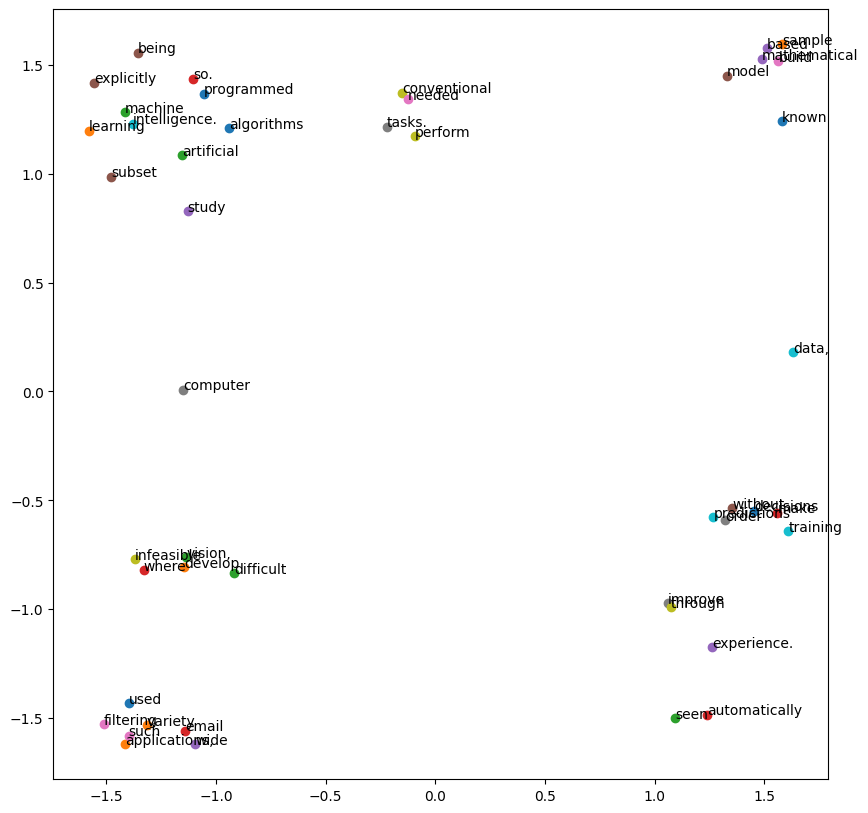

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for word in list(words_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.savefig('img.jpg')